### python basics - short overview

In [3]:
a = 5
a

5

In [4]:
b = "neki string"

In [5]:
b

'neki string'

In [6]:
a + 5

10

In [7]:
b + ' i drugi string'

'neki string i drugi string'

In [8]:
a * 2

10

In [9]:
a / 2

2.5

In [10]:
a ** 2

25

In [1]:
l = []
for i in range(5):
    l.append(i)
l

[0, 1, 2, 3, 4]

In [2]:
squares = [element**2 for element in l]
squares

[0, 1, 4, 9, 16]

In [7]:
dictionary = {
    'Petar': 'Petrovic',
    'Jovana': 'Jovanovic',
    'Marko': 'Markovic'
}

dictionary.keys()

dict_keys(['Petar', 'Jovana', 'Marko'])

In [8]:
dictionary.values()

dict_values(['Petrovic', 'Jovanovic', 'Markovic'])

### [Counting DNA nucleotides](http://rosalind.info/problems/dna/)

A string is simply an ordered collection of symbols selected from some alphabet and formed into a word; the length of a string is the number of symbols that it contains.

An example of a length 21 DNA string (whose alphabet contains the symbols 'A', 'C', 'G', and 'T') is "ATGCTTCAGAAAGGTCTTACG."

Given: A DNA string s of length at most 1000 nt.

Return: Four integers (separated by spaces) counting the respective number of times that the symbols 'A', 'C', 'G', and 'T' occur in s.

**Sample Dataset** AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC

**Sample Output** A:20 C:12 G:17 T:21

In [4]:
read = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'

In [9]:
base_counts = {}

In [5]:
base_counts = {
    'A': 0,
    'C': 0,
    'G': 0,
    'T': 0
}

for base in read:
    base_counts[base] += 1
    
print(base_counts)

{'A': 20, 'C': 12, 'G': 17, 'T': 21}


### [Complementing a strand of DNA](http://rosalind.info/problems/revc/)

In DNA strings, symbols 'A' and 'T' are complements of each other, as are 'C' and 'G'.

The reverse complement of a DNA string s is the string sc formed by reversing the symbols of s, then taking the complement of each symbol (e.g., the reverse complement of "GTCA" is "TGAC").

Given: A DNA string s of length at most 1000 bp.

Return: The reverse complement sc of s.

**Sample Dataset**
AAAACCCGGT

**Sample Output**
ACCGGGTTTT

In [1]:
dna = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'

In [14]:
rev = ''

In [15]:
# Brute force solution

In [16]:
for i in dna:
    if i=="A":
        rev = "T" +rev
    elif i =="C":
        rev = "G"+rev
    elif i == "T":
        rev = "A"+rev
    elif i == "G":
        rev = "C"+rev
print (rev)


GCTGCTATCAGACACTCTTTTTTTAATCCACACAGAGACATATTGCCCGTTGCAGTCAGAATGAAAAGCT


In [3]:
for nucleotide in ['A', 'C', 'T', 'G']:
    print(nucleotide, dna.count(nucleotide))

A 20
C 12
T 21
G 17


In [ ]:
# Pythonic solution

In [19]:
complements = {
    'A': 'T',
    'C': 'G',
    'G': 'C',
    'T': 'A'
}

rev = ''.join([complements[base] for base in dna])[::-1]
rev

'GCTGCTATCAGACACTCTTTTTTTAATCCACACAGAGACATATTGCCCGTTGCAGTCAGAATGAAAAGCT'

### [Transcrabing DNA into RNA](http://rosalind.info/problems/rna/)

An RNA string is a string formed from the alphabet containing 'A', 'C', 'G', and 'U'.

Given a DNA string t corresponding to a coding strand, its transcribed RNA string u is formed by replacing all occurrences of 'T' in t with 'U' in u.

Given: A DNA string t having length at most 1000 nt.

Return: The transcribed RNA string of t.

**Sample Dataset**
GATGGAACTTGACTACGTAAATT

**Sample Output**
GAUGGAACUUGACUACGUAAAUU

In [20]:
dna = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'

In [21]:
rna = ''

In [22]:
# Solution

In [23]:
rna = dna.replace('T', 'U')
rna

'AGCUUUUCAUUCUGACUGCAACGGGCAAUAUGUCUCUGUGUGGAUUAAAAAAAGAGUGUCUGAUAGCAGC'

### Parsing FASTQ file


In [5]:
# import required libraries
from statistics import mean
import matplotlib.pyplot as plt
# load fastq file (change path to file)

# Copy the file to your project from Data -> Public test files
fastq_path = '/sbgenomics/project-files/example_human_Illumina.pe_1.fastq'
# read lines of a file as a list
with open(fastq_path) as file:
    lines=file.readlines()

* Count the number of reads. Create a list of reads and count them

In [6]:
read_count = 0

In [7]:
# Solution
reads=[item.strip() for item in lines[1::4]]
read_count = len(reads)

print(read_count)

172


* Convert read qualities to Phred scores and save them to the Python list.

In [8]:
quals=[item.strip() for item in lines[3::4]]
phred_scores = []
phred = []
for q in quals:
    for char in q:
        phred.append(ord(char)-33)
    phred_scores.append(phred)
    phred = []

* Calculate average read qualities (use phred_scores) s and store them in a Python list.

In [31]:
av_phred_scores = [mean(phred) for phred in phred_scores]

* Create histogram of average read quality

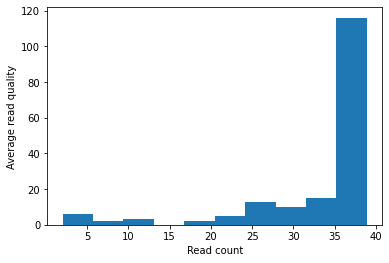

In [33]:
plt.hist(av_phred_scores)
plt.xlabel('Read count')
plt.ylabel('Average read quality')
plt.show()

* Calculate average read qualities per base (use phred_scores) and plot them

Text(0, 0.5, 'Per base sequence quality')

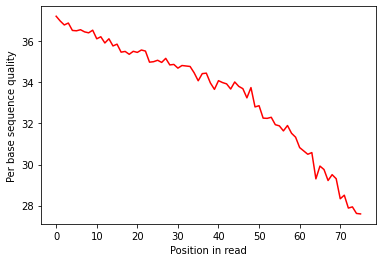

In [34]:
av_bp_scores = [mean(position) for position in zip(*phred_scores)]
plt.plot(range(0,len(av_bp_scores))av_bp_scores, 'red')
plt.xlabel('Position in read')
plt.ylabel('Per base sequence quality')

Thats it. Feel free to try other tasks and challanges available at [rosalind](https://rosalind.info/)